# The Python Data Model

## Introduction

If you are a Python beginner who started to code with a different object oriented language, you may find weird the isage of `len(collection)` instead of `collection.len()` this is only the tip of the iceberg that we call the Python data model, that, when properly understood is the key to everything we call _Pythonic_.

You can think of it as Pyhton as a framework, it formalizes the interfaces of the building blocks of the language itself, such as sequences, classes, functions or routines.

When using a framework, we spend a lot of time writing code that is going to be used by the framework, the same happens when we leverage the Python data model to build new classes, *The Python interpreter invokes special methods to perform basic object operations.*

### Special methods

This special method names are always written with leading and railing underscores, for example the notation `collection[key]` invokes a special method of the collection, named `__getitem__`, therefore we could rewrite the previous statement as `collection.__getitem__(key)`.

We write special methods when we want our objects to support and interact with fundamental language structs such as
 - Collections
 - Attribute access
 - Iteration
 - Operator overloading
 - Function and method invocation
 - String representation and formatting
 - Object creation and destruction
 
Special methods are often called _magic-methods_ this is a slang used by Ruby developers for methods with leading and railing underscores, in Python, we usually call this methods _dunder-methods_.

Let's create a new class, simple, but good enough to show de usage of `__getittem__` and `__len__` this class will represent a sequence of cards.

In [1]:
# Card class, since Deck is a sequence of cards
from typing import NamedTuple


class Card(NamedTuple):
    rank: str
    suit: str

Using a namedtuple for represent a card is to construct a simple class with static data without custom methods, like a database record.

In [2]:
# Deck class
class Deck:
    
    ranks = [str(n) for n in range(2, 11)] + list("JQKA")
    suits = "spades diamonds clubs hearts".split()

    def __init__(self):
        # Trailing underscores before an attribute will make it
        # private, with only one underscore the attribute is still
        # public but is a convention to mark it as private.
        self.__cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]

    def __len__(self) -> int:
        return len(self.__cards)

    def __getitem__(self, position: int) -> Card:
        return self.__cards[position]

But the point of this example is show the usage of special methods, since we created a `__len__` dunder-method for our class, we unlock multiple features that will make our class to behavior as a Python built-in collection, for example `len()` function will return the number of cards in the deck.

In [3]:
deck = Deck()
len(deck)

52

We can use `collection[key]` notation since we already defined a `__getitem__` dunder-method to fetch an specific card.

In [4]:
deck[0]

Card(rank='2', suit='spades')

But many more Python features make usage of the previous defined dunder-methods, fetching a random card from the deck using the `random` built-in package is now available since `Deck.__getitem__` exists.

In [5]:
from random import choice

choice(deck)

Card(rank='4', suit='hearts')

This implementation of only two dunder-methods makes our code more intuitive, benefit ourselfs of the rich Python standard library avoids reinventing the wheel.

But it is not all, since `__getitem__` delegates the `[]` operator to `self.__cards` our deck automatically supports slicing, therefore we can fetch slices of our decks such as 

In [6]:
deck[3:7]

[Card(rank='5', suit='spades'),
 Card(rank='6', suit='spades'),
 Card(rank='7', suit='spades'),
 Card(rank='8', suit='spades')]

In [7]:
deck[:5]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades'),
 Card(rank='5', suit='spades'),
 Card(rank='6', suit='spades')]

`__getitem__` makes our deck iterable automatically

In [8]:
for card in deck:
    if card.suit == "spades":
        print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')


Our deck is now reversable

In [9]:
for card in reversed(deck):
    if card.suit == "spades":
        print(card)

Card(rank='A', suit='spades')
Card(rank='K', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='J', suit='spades')
Card(rank='10', suit='spades')
Card(rank='9', suit='spades')
Card(rank='8', suit='spades')
Card(rank='7', suit='spades')
Card(rank='6', suit='spades')
Card(rank='5', suit='spades')
Card(rank='4', suit='spades')
Card(rank='3', suit='spades')
Card(rank='2', suit='spades')


Iteration is often implicit, for example, if a collection has no `__contains__` method, the `in` operator will perform a sequential scan of the collection to assert the presence of an object.

In [10]:
Card("Q", "hearts") in deck

True

In [11]:
Card("0", "shields") in deck

False

A method to sort the cards in a french deck is usually by rank and suit, the following function assign a value to a card depending the rank and suit, 0 for 2 of clubs  and 51 for ace of spades.

In [12]:
SUIT_VALUES = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def value_in_deck(card: Card) -> int:
    rank_value = Deck.ranks.index(card.rank)
    return rank_value * len(SUIT_VALUES) + SUIT_VALUES[card.suit]

This now allows us to sort our deck using `value_in_deck` as key.

In [13]:
sorted_deck = sorted(deck, key=value_in_deck)
print(sorted_deck[0])
print(sorted_deck[-1])

Card(rank='2', suit='clubs')
Card(rank='A', suit='spades')


As you can see, our class `Deck` behaves like a standard Python sequence, allowing us to take advantage of the core language feeatures, like slicing, iterating, sorting and reversing thanks to delegate `__len__` and `__getitem__` to an internal attribute `__cards__`

#### How-to use special methods

As you already guessed, calling `len(collection)` function will actually invoke the `__len__` special method of our `Deck` class.

But it is not always like this, the interpreter takes a shortcut for built-in python datatypes, since they are witten in C, the struct `PyVarObject` contains an `ob_size` attribute, therefore, `len()` only returns the value of that attribute since is much faster than calling a method.

More often than not, special method calls are implicit, for example, the statement `for i in collection` actually invokes `iter(collection)` which in turn, calls `collection.__iter__()` if it is available, if not, it will call `collection.__getitem__` as shown above.

Normally your code should not have many direct calls to special methods, unless you are doing a metaprogramming implementation, the only special method that is usually called directly is `__init__` for initializate an object.

### Emulating numeric types

As we reviewed, we can implement many methods to emulate collections or sequences, but we can do pretty much the same to emulate numeric types, let's implement a simple two-dimensional vector to show which special methods we can define to make our classes behave as a numeric built-in data type.

For a class Vector we may be interested on adding two of them, multiply by a scalar, fetch its absolute value and get a nice string-representation of it, there fore we'll need to define the special methods `__abs__ __add__ __mul__` and `__repr__`.

In [21]:
import math

class Vector:

    def __init__(self, x: int = 0, y: int = 0):
        self.x = x
        self.y = y

    def __repr__(self):
        x, y = self.x, self.y
        return f"Vector({x=}, {y=})"

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __add__(self, other):
        x = self.x + other.x
        y = self.x + other.y
        return Vector(x, y)

    def __mul__(self, scalar: float):
        return Vector(self.x * scalar, self.y * scalar)


Please note how, even inside the same class, we don't call `__abs__` method directly, neither with `__init__` since as we said, the magic methods invoking is usually performed by the intepreter rather than us.

#### String representation

We use the method `__repr__` this string should be unambiguous and if possible match the source code, in contrast `__str__` must be focused on display info to the terminal or logs. Of course, `__repr__` is invoked by `repr()` and `__str__` by `str()` and `print()`.

If `__repr__` is user-friendly enough, coding `__str__` is not necessary, since any method which calls `__str__` will use `__repr__` as fallback.


#### Boolean value

By default any value different to `None` will be evaluated as _truthy_ but if we need a custom implementation for our classes we'll need to define `__bool__` if this method is not defined Python interpreter will try to use `__len__` and returns `False` if the object `__len__` is zero, `True` otherwise.

It is important to say that `if` also invokes `__bool__` method of a class, if not, it will only assert that the object is not None, `__bool__` must return either `True` or `False` if it returns any other data-type, it will raise an exception, even if the value is _truthy_

#### Collection API

To implement a complete _collection-like_ class, it must follow the next UML diagram, implement the required interfaces according to your class scope.

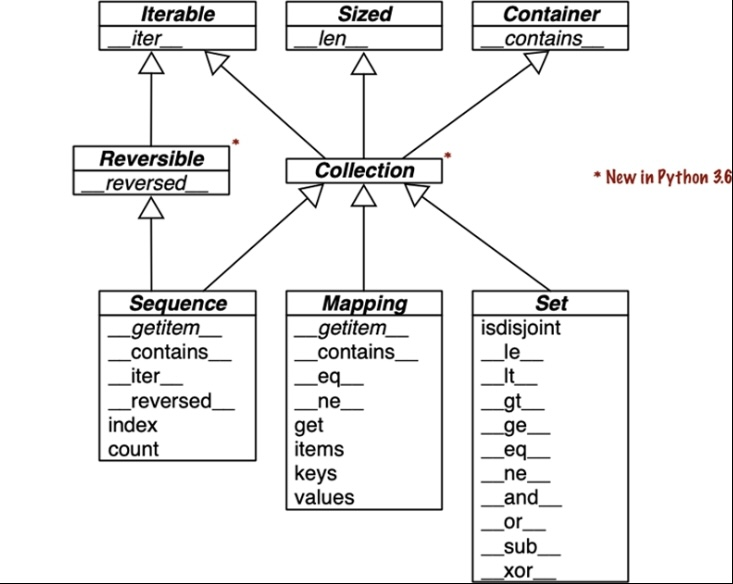

For example
 - Iterable to support `for`, unpacking and other iterations like reversion and sorting
 - Sized to support `len()` builtin function
 - Container to support `in` operator

### Conclusion

Emulating built-in types is one of the most common uses for special methods, we only saw a few special methods, actually the Python reference includes more than 80 special methods to describe behaviors like bitwise operation, comparations and many more.

The flexibility of the language is something not that common, in contrast Go language has arrays, strings and slices as built-in types, they support iteration, `obj[key]` notation and sorting and reversing operations, but there is no way to define a custom data struct which allows you to support everything previously mentioned, that means that all, iteration, indexing, slicing and mo